In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import core
import pytesseract
from PIL import Image
% matplotlib inline


def draw_comparison_mats(mats, figsize=(12, 4), cmaps=None, interpolations=None):
    fig = plt.figure(figsize=figsize)

    for i, mat in enumerate(mats, start=1):
        a = fig.add_subplot(1, len(mats), i)
        a.set_title('image' + str(i))
        # http://stackoverflow.com/a/14728122/2692914 (interpolation method)
        if cmaps is None:
            plt.imshow(mats[i - 1])
        else:
            if interpolations is None:
                plt.imshow(mats[i - 1], cmap=cmaps[i - 1])
            else:
                plt.imshow(mats[i - 1], cmap=cmaps[i - 1], interpolation=interpolations[i - 1])
    plt.show()

print("compiled")

compiled


img (2).jpg


q1 no roi detected: the object must be the only 4-corner object in the image
q2 only 4-corner objects for now
q3 only 4-corner objects for now


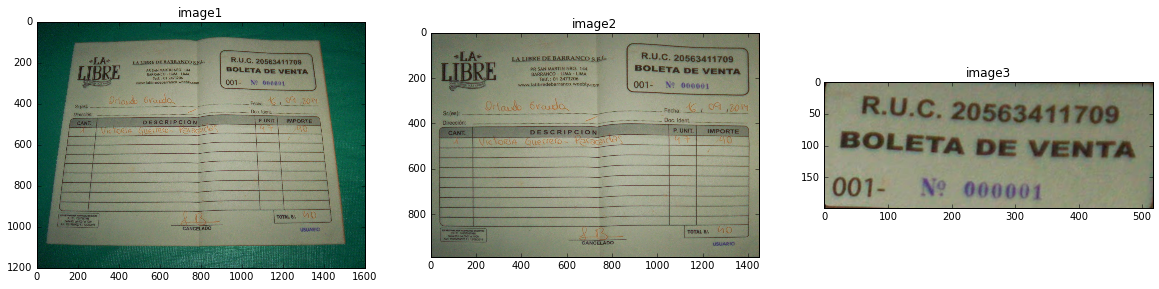

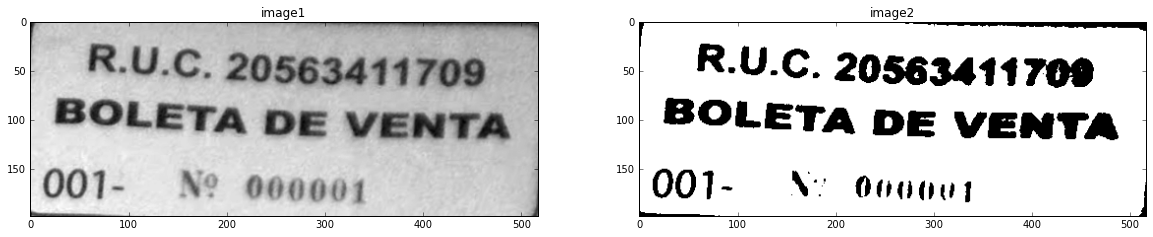

V R.U.C. 20563411709

BOLETA DE VENTA
001- \".' ommui J


In [3]:
images = [
    # "img (1).jpg",
    "img (2).jpg",
    # "img (3).jpg",
    # "img (4).jpg",
    # "img (5).jpg",
    # "img (6).jpg",
    # "img (7).jpg",
    # "img (8).jpg",
    # "img (9).jpg",
    # "img (10).jpg",
    # "img (11).jpg",
    # "img (12).jpg",
    # "img (13).jpg",
    # "img (14).jpg",
]
minArea = 200 * 300
for image in images:
    print(image)
    img = cv2.imread(image)
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    roi = core.getROI(img)
    roiheader = core.getROIHeader(roi)
    draw_comparison_mats([img, roi, roiheader], (20, 8), ['gray', 'gray', 'gray'])

    roiheader = cv2.cvtColor(roiheader, cv2.COLOR_RGB2GRAY)
    _, bin = cv2.threshold(roiheader, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # roih = roiheader.shape[0]
    # bin = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (int(roih / 10), int(roih / 20))))
    bin = cv2.bitwise_not(bin)
    draw_comparison_mats([roiheader, bin], (20, 8), ['gray', 'gray', 'gray'])
    cv2.imwrite("text.jpg", bin)
    
    img = Image.open("D:\\FF\\boletas\\dev\\boletas-py\\text.jpg")
    text = pytesseract.image_to_string(img)
    print(text)